In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\DS\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Загрузим данные и посмотрим случайные 10 сторок датасета

In [2]:
summer_camp = pd.read_csv('C:/DS/realweb/summer_camp_data.csv')

In [3]:
summer_camp.sample(10)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
36118,2020-03-20,other,organic,Не определено,Десктоп,yes,no,14,3,30,6,3,1,1579.0
31525,2020-08-15,google,cpc,Доставки нет,Мобайл,no,no,7,1,20,4,12,0,0.0
41758,2020-04-09,eLama,cpc,Доставка есть,Десктоп,yes,no,31,3,70,14,10,2,2715.0
22881,2020-04-14,bing,organic,Не определено,Десктоп,no,no,3,2,0,0,0,0,0.0
12554,2020-06-19,yandex,organic,Не определено,Десктоп,yes,yes,149,22,610,122,101,5,5551.0
37381,2020-09-08,admitad,cpa,Доставка есть,Мобайл,yes,yes,18,2,40,8,12,2,1902.0
15450,2020-01-19,yandex,organic,Доставка есть,Десктоп,no,no,279,33,820,164,118,26,38048.0
45768,2020-09-30,eLama,cpc,Не определено,Десктоп,yes,no,47,13,110,22,10,3,2904.0
10966,2020-04-15,google,organic,Доставка есть,Десктоп,yes,no,805,52,2000,400,263,48,52146.0
44268,2020-03-15,(direct),(none),Не определено,Мобайл,no,yes,68,12,90,18,5,1,1037.0


# Посмотрим какие типы данных у нас присутствуют и нет ли пропущенных значений

In [4]:
summer_camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52721 entries, 0 to 52720
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                52721 non-null  object 
 1   source              52721 non-null  object 
 2   medium              52721 non-null  object 
 3   delivery_available  52721 non-null  object 
 4   device_type         52721 non-null  object 
 5   promo_activated     52721 non-null  object 
 6   filter_used         52721 non-null  object 
 7   pageviews           52721 non-null  int64  
 8   visits              52721 non-null  int64  
 9   productClick        52721 non-null  int64  
 10  addToCart           52721 non-null  int64  
 11  checkout            52721 non-null  int64  
 12  transactions        52721 non-null  int64  
 13  revenue             52721 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 5.6+ MB


# Какой рекламный канал принёс больше всего дохода за всё время?

Построим визуализацию, чтобы узнать самый прибыльный канал за всё время

([<matplotlib.axis.XTick at 0x21de2550a30>,
  ...],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0,

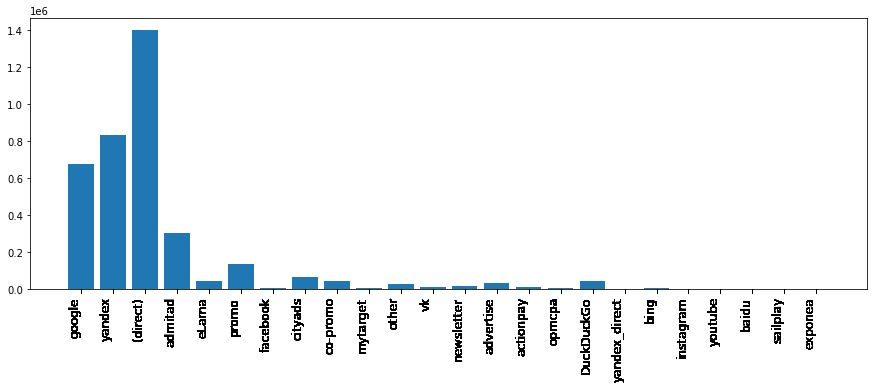

In [27]:
plt.figure(figsize=(15,5))
plt.bar(summer_camp['source'], summer_camp['revenue'])
plt.xticks(summer_camp['source'], rotation=90, horizontalalignment='right', fontsize=12)

Как мы видим самый прибыльный канал - это (direct)

# 2 Средний чек транзакции

Для нахождения среденего чека добавим столбец "average_checkк" в таблицу. Для этого разделим столбец доход (revrnue) на еоличество транзакций в этот день (transactions)

In [5]:
summer_camp['average_check'] = summer_camp['revenue']/summer_camp['transactions']

In [6]:
summer_camp.head(10)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,average_check
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0,962.766667
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0,1126.626728
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0,1051.500000
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0,1112.718310
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0,997.758065
5,2020-05-11,yandex,cpc,Не определено,Десктоп,no,no,2775,1441,5990,1196,549,76,90862.0,1195.552632
6,2020-05-11,yandex,organic,Не определено,Мобайл,no,no,3116,1395,4950,990,703,112,111012.0,991.178571
7,2020-05-11,yandex,cpc,Не определено,Мобайл,no,no,3854,1842,7310,1462,913,150,168397.0,1122.646667
8,2020-05-11,yandex,cpc,Не определено,Десктоп,yes,no,2816,510,8450,1688,949,170,187452.0,1102.658824
9,2020-05-11,(direct),(none),Не определено,Десктоп,yes,no,1184,324,2710,542,269,54,67849.0,1256.462963


Для сортировке по дате преобразуем столбец с датой из формата object в формат datetime

In [7]:
summer_camp['date'] = pd.to_datetime(summer_camp['date'])

In [8]:
summer_camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52721 entries, 0 to 52720
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                52721 non-null  datetime64[ns]
 1   source              52721 non-null  object        
 2   medium              52721 non-null  object        
 3   delivery_available  52721 non-null  object        
 4   device_type         52721 non-null  object        
 5   promo_activated     52721 non-null  object        
 6   filter_used         52721 non-null  object        
 7   pageviews           52721 non-null  int64         
 8   visits              52721 non-null  int64         
 9   productClick        52721 non-null  int64         
 10  addToCart           52721 non-null  int64         
 11  checkout            52721 non-null  int64         
 12  transactions        52721 non-null  int64         
 13  revenue             52721 non-null  float64   

Отсортирум таблицу по дате \
И построим график изменения среднего чека

In [9]:
summer_camp = summer_camp.sort_values(by='date')

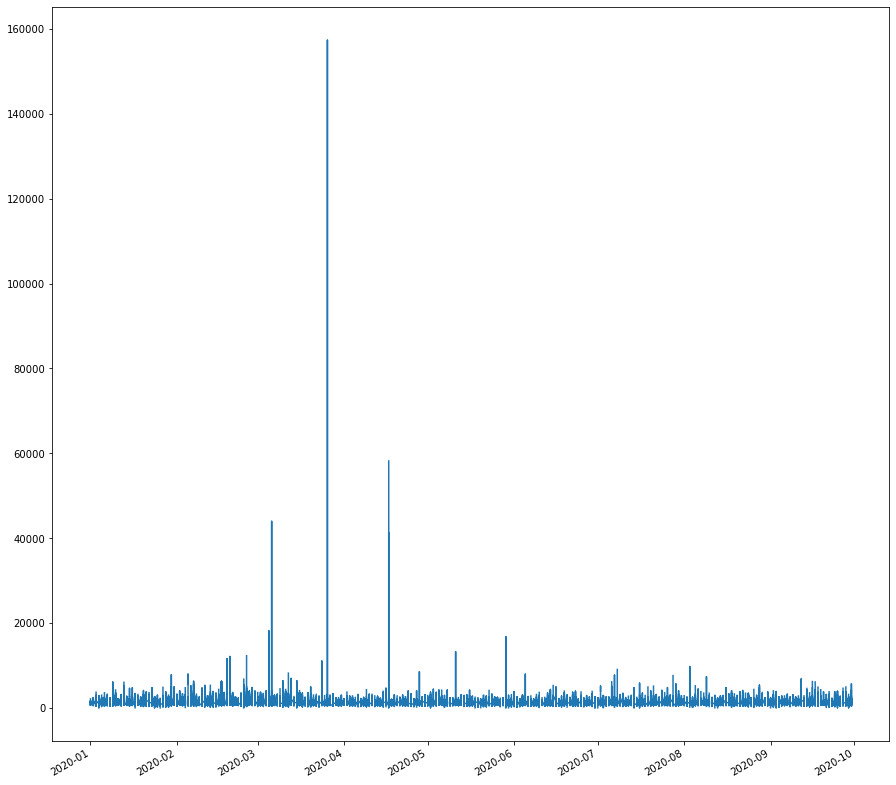

In [77]:
fig, ax = plt.subplots(1, figsize=(15,15))
ax.plot(summer_camp['date'], summer_camp['average_check'])

#повернуть подписи по оси x
fig.autofmt_xdate()


Как мы видим распределение в целом одинаковое за весь период. Но брасается в глаза выброс в конце марта, как раз в период начала коыидных ограничений. Видимо народ бросился тратить деньги.

Посчитаем среднее значение среднего чека до ограничений. Точных дат не помню, но примем за дату начала 15 марта 2020 года.

Средний чек до COVID19

In [10]:
summer_camp.loc[summer_camp['date'] <= '2020-03-15', 'average_check' ].mean()

1292.789925364845

Средний чек после COVID19

In [11]:
summer_camp.loc[summer_camp['date'] > '2020-03-15', 'average_check' ].mean()

1193.6272879539526

Как мы видим средний чек снизился почти на 100 пунктов

Рассмотрим влияние промокода у покупателей

Есть код:

In [12]:
summer_camp.loc[summer_camp['promo_activated'] == 'yes', 'average_check' ].mean()

1224.5259878523234

Нет кода:

In [13]:
summer_camp.loc[summer_camp['promo_activated'] == 'no', 'average_check' ].mean()

1214.4283274951254

Наличие промокода увеличивает средний чек на 10 едениц, что на мой взгляд не так много, как хотелось бы.

# 3 коэффициент конверсии

Коэффициент конверсии (conversion rate) — это доля пользователей, которые совершили целевое действие — зарегистрировались, подписались на рассылку, заполнили форму, оформили покупку — в общем количестве посетителей сайта.

До конца непонятно что использовать для расчёта конверсии "pageviews" или "visits". Поэтому посчитаем для обоих показателей

Добавим столбцы с коэффициентом конверсии в таблицу

In [14]:
summer_camp['CR for pageviews'] = summer_camp['transactions']/summer_camp['pageviews']
summer_camp['CR for visits'] = summer_camp['transactions']/summer_camp['visits']

In [15]:
summer_camp.head(10)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,average_check,CR for pageviews,CR for visits
25155,2020-01-01,newsletter,email,Не определено,Мобайл,no,no,5,4,0,0,0,0,0.0,NaN,0.000000,0.000000
26191,2020-01-01,cityads,cpa,Не определено,Десктоп,no,no,2,2,0,0,0,0,0.0,NaN,0.000000,0.000000
43336,2020-01-01,yandex,cpc,Доставка есть,Десктоп,yes,yes,27,3,80,16,9,3,3204.0,1068.000000,0.111111,1.000000
26247,2020-01-01,bing,organic,Не определено,Десктоп,no,no,3,2,0,0,0,0,0.0,NaN,0.000000,0.000000
21388,2020-01-01,eLama,cpc,Не определено,Мобайл,no,no,28,27,0,0,0,0,0.0,NaN,0.000000,0.000000
18543,2020-01-01,advertise,cpa,Не определено,Не определено,no,no,86,46,0,0,0,1,899.0,899.000000,0.011628,0.021739
18542,2020-01-01,google,organic,Не определено,Не определено,no,no,86,76,0,0,0,5,6661.0,1332.200000,0.058140,0.065789
15891,2020-01-01,yandex,cpc,Доставка есть,Десктоп,no,no,140,22,380,74,87,17,20223.0,1189.588235,0.121429,0.772727
36675,2020-01-01,yandex,cpc,Доставки нет,Мобайл,no,no,12,2,40,8,5,1,788.0,788.000000,0.083333,0.500000
29477,2020-01-01,admitad,cpa,Не определено,Десктоп,yes,yes,4,1,10,2,1,0,0.0,NaN,0.000000,0.000000


Создадим столбец с днём недели

In [16]:
summer_camp['day_of_week'] = summer_camp['date']. dt.day_name ()

In [17]:
summer_camp.sample(10)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,average_check,CR for pageviews,CR for visits,day_of_week
27215,2020-06-04,eLama,cpc,Не определено,Не определено,no,no,0,1,0,0,0,1,859.0,859.000000,inf,1.000000,Thursday
6474,2020-02-15,eLama,cpc,Не определено,Мобайл,no,no,594,347,1170,234,145,24,23253.0,968.875000,0.040404,0.069164,Saturday
49163,2020-04-22,yandex,organic,Доставка есть,Мобайл,yes,yes,52,3,160,32,20,3,3334.0,1111.333333,0.057692,1.000000,Wednesday
97,2020-05-29,admitad,cpa,Не определено,Десктоп,no,no,1897,826,760,152,86,14,13919.0,994.214286,0.007380,0.016949,Friday
29265,2020-02-16,opmcpa,cpa,Не определено,Мобайл,no,no,6,5,10,2,0,0,0.0,NaN,0.000000,0.000000,Sunday
22035,2020-01-14,eLama,cpc,Не определено,Десктоп,no,yes,1,1,0,0,0,0,0.0,NaN,0.000000,0.000000,Tuesday
50721,2020-08-26,yandex,cpc,Доставки нет,Мобайл,no,no,191,5,190,38,36,0,0.0,NaN,0.000000,0.000000,Wednesday
15499,2020-07-29,yandex,organic,Не определено,Мобайл,yes,yes,120,9,290,58,92,2,2993.0,1496.500000,0.016667,0.222222,Wednesday
38493,2020-06-03,bing,organic,Доставка есть,Десктоп,yes,no,10,1,40,8,3,1,626.0,626.000000,0.100000,1.000000,Wednesday
3425,2020-07-07,(direct),(none),Не определено,Десктоп,no,no,981,451,2060,410,297,44,62476.0,1419.909091,0.044852,0.097561,Tuesday


Для удобства анализа создадим таблицу из трёх интересующих нас столбцов

In [30]:
CR_weekday = summer_camp[['day_of_week','CR for pageviews', 'CR for visits']]

In [31]:
CR_weekday.sample(50)

,day_of_week,CR for pageviews,CR for visits
31990,Wednesday,0.030303,0.500000
17294,Wednesday,0.068493,0.500000
28569,Saturday,0.000000,0.000000
19279,Friday,0.000000,0.000000
33033,Thursday,0.029412,1.000000
51867,Thursday,0.030612,0.130435
19732,Friday,0.000000,0.000000
3392,Tuesday,0.015388,0.070115
42734,Saturday,0.060606,0.500000
19909,Sunday,0.225000,0.500000


Как мы видим из таблицы CR не сильно завсит от дня недели. Поэтому он будет разный не только в будни и выходные, но и в принцие в любые дни недели. Поэтому отвечая на вопрос задания, да, с вероятность в 95% CR в выходные дни отличается от CR в будние дни

# 4 Прогноз доходов

Для прогназирования дохода предлагаю построить модель линейной регрессии. Для лучшего выбора параметров предлагаю посмотреть на матрицу корреляции

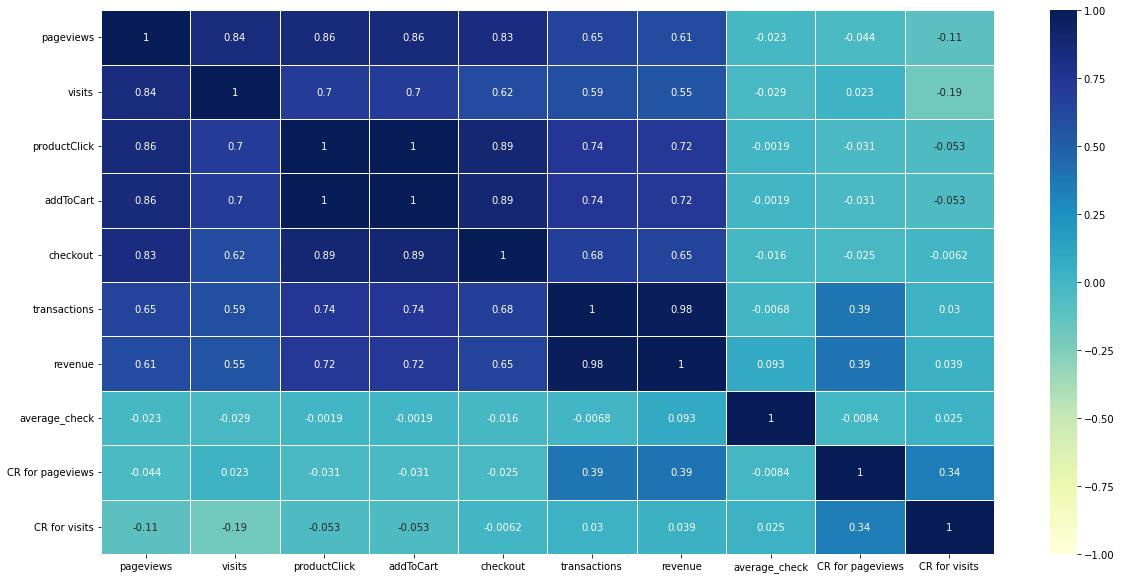

In [35]:
plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(summer_camp.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

Много признаков скоррелированы хорошо. Можно порробывать применить линейную регрессию.\
Для этого загрузим необходимые библиотеки

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

Как мы видели выше из графика дохода по времени у нас есть анамальные значения, предлагаю от них избавиться. Для наглядности используем "ящик с усами" 

In [38]:
def get_boxplot(X, columns=[]):
  for i in columns:
    sns.boxplot(x=X[i])
  pass  

def get_pairplot(X, columns=None):
  if columns is None:
    columns = list(X.columns)
  sns.pairplot(X[columns])
  pass

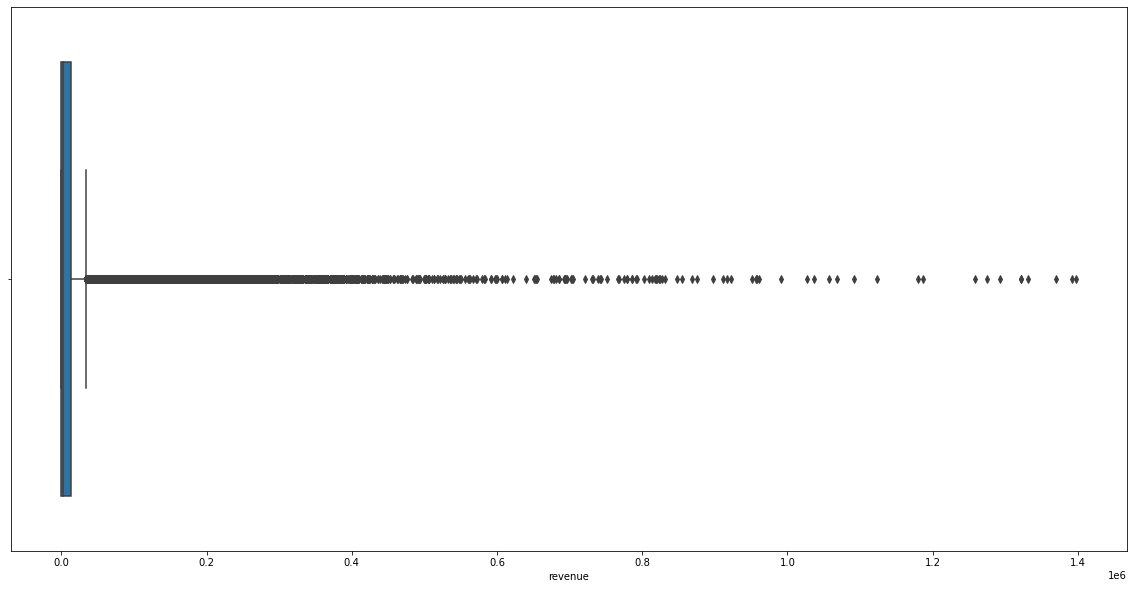

In [39]:
get_boxplot(summer_camp, columns = ['revenue'])

Предлагаю считать выбросом всё, что выше 20000. Удалим их из таблицы

In [41]:
summer_camp_1 = summer_camp[summer_camp["revenue"] < 20000]

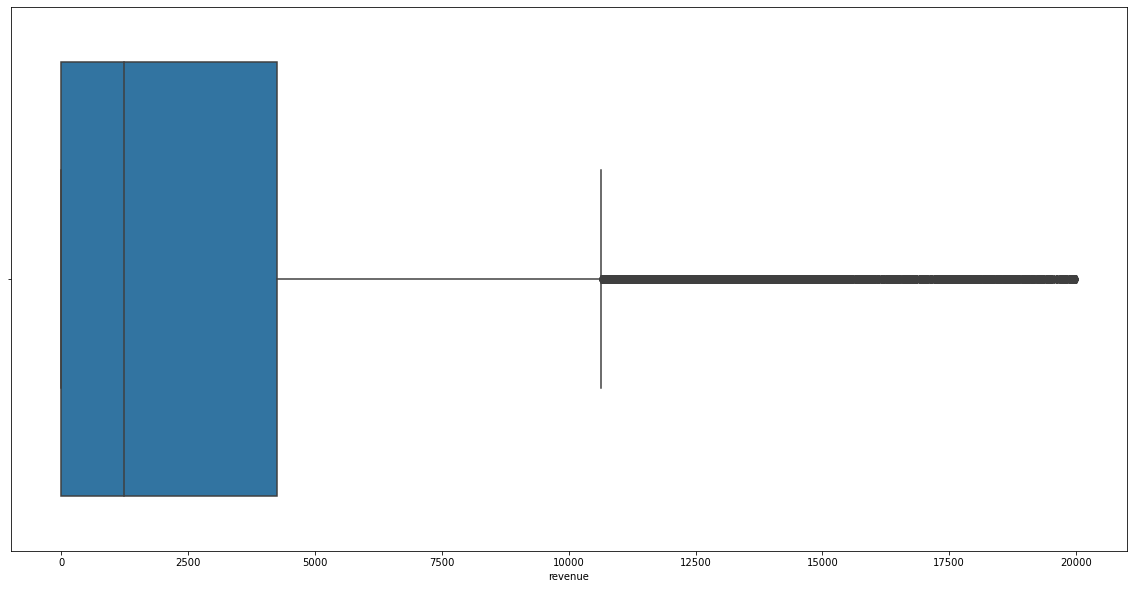

In [42]:
get_boxplot(summer_camp_1, columns = ['revenue'])

In [55]:
x = summer_camp_1[['visits','productClick', 'addToCart', 'checkout']]
y = summer_camp_1['revenue']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [56]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(x_test)
y_pred

array([ 1592.57217566,  1241.13410151, 10860.02451991, ...,
        3016.53483495,  5610.48817957,  2324.19144434])

In [58]:
result = x_test.copy()
result['y_pred'] = y_pred
result['y_test'] = y_test
result['difference'] = y_test - y_pred
result.head()

,visits,productClick,addToCart,checkout,y_pred,y_test,difference
36545,120,40,8,15,1592.572176,1308.0,-284.572176
31542,1,20,4,5,1241.134102,0.0,-1241.134102
12388,23,600,120,101,10860.024520,19509.0,8648.975480
40475,5,60,14,24,1888.090255,0.0,-1888.090255
16610,28,770,154,78,12490.690458,15074.0,2583.309542


Как мы видим линейная регрессия отрабатываает плохо. Можно ещё применить лэйбл или хот энкодинг для нечисловых даннх. Но думаю это не даст результата, так как предсказание временного ряда - это задача для более сложных моделей. 

Поэтому я бы добавил ещё данных за другие года, так как 2020 год - год COVID, где поведение пользователей могло сильно изменииться. \
И после этого проверил бы ряд на стационарность и сезонность и применил модель ARIMA.